In [42]:
%matplotlib inline
from scipy.stats import binom
from pandas import Series
from matplotlib.pyplot import figure, savefig, ylim, legend, gca, plot
from matplotlib import rc
from seaborn import barplot
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

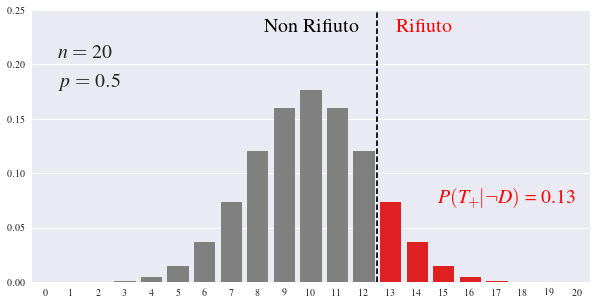

In [43]:
n=20; k=13; p=0.5

y = Series( binom.pmf(range(n+1),n,p) )
q = sum(y[y.index>=k])

f = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['red' if (i >= k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(20, 0.07, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')
plot([12.5,12.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p001.pdf',bbox_inches='tight')

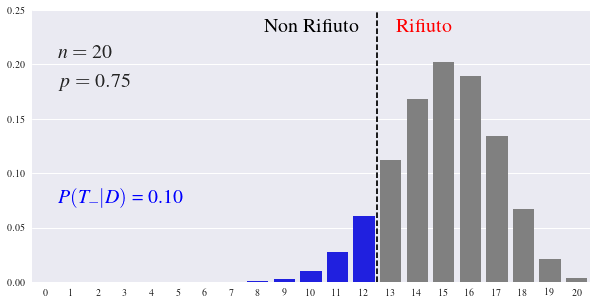

In [44]:
p=0.75

f = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) else 'gray' for i in range(n+1) ]
y = Series( binom.pmf(range(n+1),n,p) )
q = sum(y[y.index<k])
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(0.5, .07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')

plot([12.5,12.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p002.pdf',bbox_inches='tight')

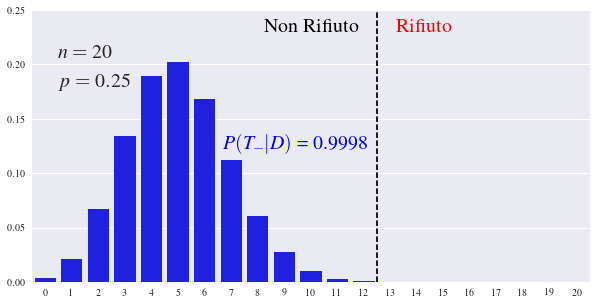

In [45]:
p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum(y[y.index<k])

f = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(6.7, .12, '$P(T_-|D)$\ =\ {:.4f}'.format(q), color='blue')
plot([12.5,12.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p003.pdf',bbox_inches='tight')

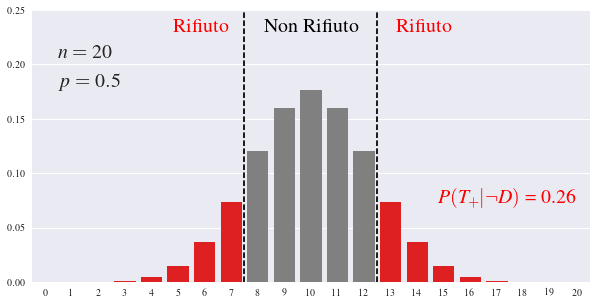

In [46]:
p=0.5

y = Series( binom.pmf(range(n+1),n,p) )
q = 2 * sum(y[y.index>=k])

f4 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['red' if (i >= k) or (i <= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(20, 0.07, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')

plot([12.5,12.5],[0,1], linestyle='--', color='black')
plot([7.5,7.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p004.pdf',bbox_inches='tight')

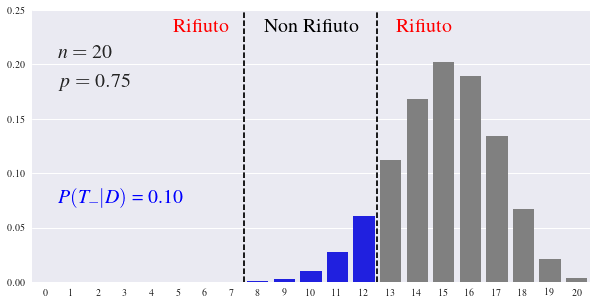

In [47]:
p=0.75

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f5 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) and (i >= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(0.5, .07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')

plot([12.5,12.5],[0,1],  linestyle='--', color='black')
plot([7.5,7.5],[0,1],  linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p005.pdf',bbox_inches='tight')

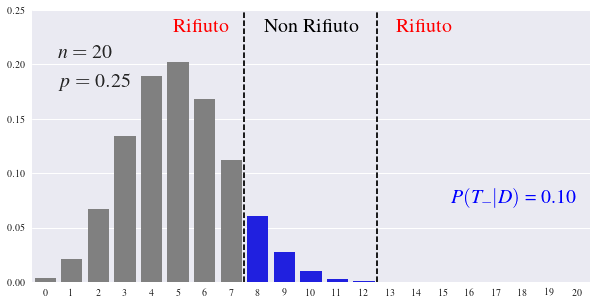

In [48]:
p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f6 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(20, 0.07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')

plot([12.5,12.5],[0,1],  linestyle='--', color='black')
plot([7.5,7.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p006.pdf',bbox_inches='tight')

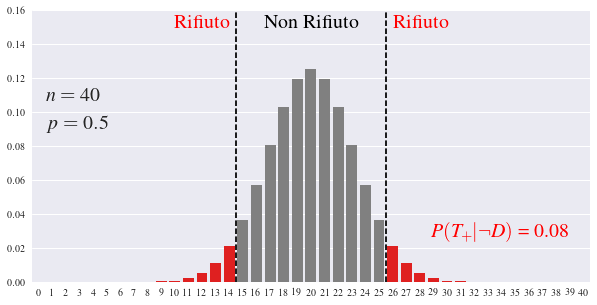

In [53]:
n=40; k=26; p=0.5

y = Series( binom.pmf(range(n+1),n,p) )
q = 2 * sum(y[y.index>=k])

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['red' if (i >= k) or (i <= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(n-1, 0.025, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p007.pdf', bbox_inches='tight' )

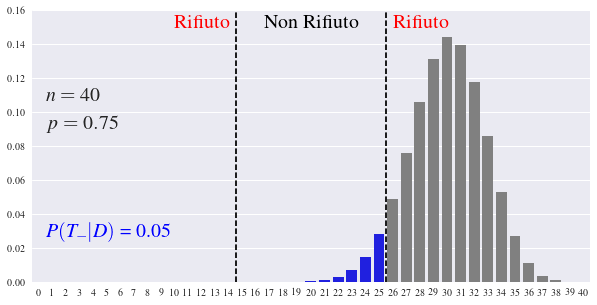

In [50]:
n=40; k=26; p=0.75

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(0.5, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p008.pdf', bbox_inches='tight' )

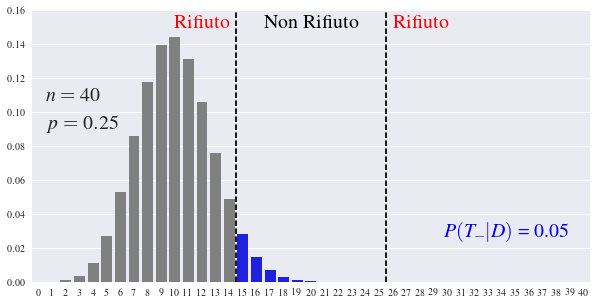

In [51]:
n=40; k=26; p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(n-1, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p009.pdf', bbox_inches='tight' )